In [3]:
import warnings as war
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,roc_curve,RocCurveDisplay
from sklearn.metrics import mean_absolute_error,accuracy_score,precision_score,mean_squared_error,r2_score,f1_score,recall_score
war.filterwarnings('ignore')
sns.set_theme(color_codes=True)

In [4]:
df=pd.read_csv("C:\\Users\\pc\\Documents\\train_u6lujuX_CVtuZ9i.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.shape

(614, 13)

In [6]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
cat=df.select_dtypes(include='object').columns.tolist()
cat

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [8]:
num=df.select_dtypes(include=['int','float']).columns.tolist()
num

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [9]:
for col in cat[2:]:
    print(f'{col}:{df[col].unique()}')

Married:['No' 'Yes' nan]
Dependents:['0' '1' '2' '3+' nan]
Education:['Graduate' 'Not Graduate']
Self_Employed:['No' 'Yes' nan]
Property_Area:['Urban' 'Rural' 'Semiurban']
Loan_Status:['Y' 'N']


In [10]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
np.median(df['ApplicantIncome'])

3812.5

In [12]:
df['LoanAmount']=df['LoanAmount'].fillna(np.median(df['ApplicantIncome']))

In [13]:
L=df['Loan_Amount_Term'].median()
C=df['Credit_History'].median()

In [14]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(L)
df['Credit_History']=df['Credit_History'].fillna(C)

In [15]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
columns=['Gender','Dependents','Self_Employed']
df.dropna(subset=columns,inplace=True)

In [17]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [18]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,3812.5,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [19]:
df.drop(columns=['Loan_ID'],inplace=True)


In [20]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,3812.5,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [21]:
Le=LabelEncoder()
for col in cat[1:]:
    df[col]=Le.fit_transform(df[col])
    print(f'{col}:{df[col].unique()}')

Gender:[1 0]
Married:[0 1]
Dependents:[0 1 2 3]
Education:[0 1]
Self_Employed:[0 1]
Property_Area:[2 0 1]
Loan_Status:[1 0]


In [22]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,3812.5,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


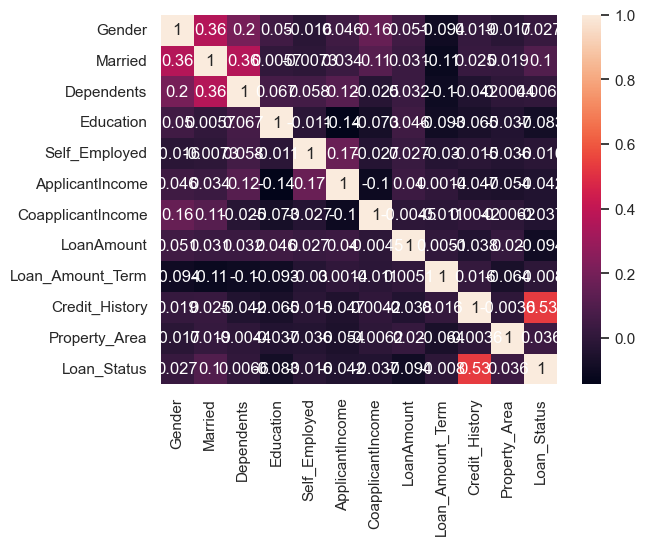

In [23]:
cor=df.corr()
sns.heatmap(cor,
           annot=True);

In [24]:
num

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

## Outliers

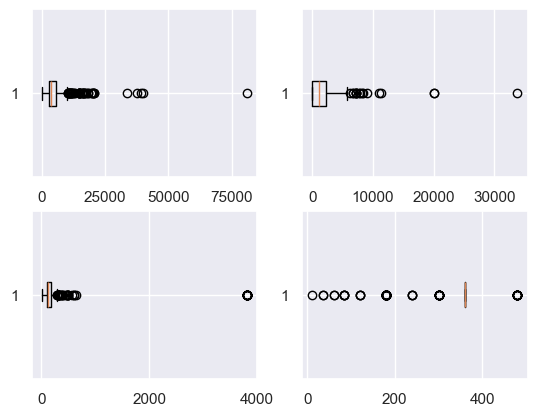

In [26]:
plt.subplot(2,2,1)
plt.boxplot(df['ApplicantIncome'],vert=False);

plt.subplot(2,2,2)
plt.boxplot(df['CoapplicantIncome'],vert=False);

plt.subplot(2,2,3)
plt.boxplot(df['LoanAmount'],vert=False);

plt.subplot(2,2,4)
plt.boxplot(df['Loan_Amount_Term'],vert=False);


In [27]:
X=df.drop(columns=['Loan_Status'])
y=df['Loan_Status']

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [29]:
X_train.shape

(443, 11)

In [30]:
from scipy import stats

In [31]:
selected_columns=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
z_score=np.abs(stats.zscore(X_train[selected_columns]))
threshold=2.5
outlier_indices=np.where(z_score > threshold)[0]
X_train=X_train.drop(X_train.index[outlier_indices])
y_train=y_train.drop(y_train.index[outlier_indices])

In [32]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
269,0,0,1,0,0,2876,1560.0,90.0,360.0,1.0,2
565,1,1,0,1,0,4467,0.0,120.0,360.0,1.0,0
20,1,1,0,1,0,7660,0.0,104.0,360.0,0.0,2
361,1,1,2,0,0,5000,3667.0,236.0,360.0,1.0,1
538,1,1,0,1,0,2917,536.0,66.0,360.0,1.0,0


In [33]:
X_train.shape

(403, 11)

In [34]:
Rf=RandomForestClassifier()
Rf

RandomForestClassifier()

In [35]:
Rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [36]:
param_grid={
    'criterion':['entropy','gini','log_loss'],
    'max_depth':[2,3,4,5,6,7,8],
    'random_state':[0,42],
    "min_samples_split":[2,3,4],
    "min_samples_leaf":[1,2,3,4],
}

In [37]:
grid_search=GridSearchCV(Rf,
            param_grid,
            cv=5,
            scoring='accuracy',
            verbose=True,
            )

In [38]:
grid_search

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'random_state': [0, 42]},
             scoring='accuracy', verbose=True)

In [39]:
grid_search.fit(X_train,y_train)


Fitting 5 folds for each of 504 candidates, totalling 2520 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'random_state': [0, 42]},
             scoring='accuracy', verbose=True)

In [40]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'random_state': 42}

In [41]:
grid_search.best_score_

0.8213888888888888

In [42]:
dtree=RandomForestClassifier(criterion='gini',
                      max_depth=8,
                      min_samples_leaf=1,
                      min_samples_split=2,
                      random_state=42)
model=dtree.fit(X_train,y_train)
model

RandomForestClassifier(max_depth=8, random_state=42)

In [43]:
y_pred=model.predict(X_test)
y_pred[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [44]:
y_test[:10]

89     1
87     1
289    1
512    1
182    1
609    1
145    1
92     1
151    1
455    1
Name: Loan_Status, dtype: int32

In [45]:
accuracy_score(y_test,y_pred)

0.8378378378378378

In [46]:
precision_score(y_test,y_pred)

0.8210526315789474

In [47]:
recall_score(y_test,y_pred)

0.9873417721518988

In [48]:
mean_absolute_error(y_test,y_pred)

0.16216216216216217

In [49]:
mean_squared_error(y_test,y_pred)

0.16216216216216217

In [50]:
df.to_csv('loan_preprocessed_data.csv',index=False)